In [ ]:
#IMPORTING LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  #ploting
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#Imputation Libraries
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Preprocesssing

In [ ]:
#IMPORTING DATASET
#Here we are givnig the path of the dataset we change this for differnt datsets and run the code
data = pd.read_csv('/content/drive/MyDrive/pds_project/Dataset/riceClassification.csv') 
#data = pd.read_csv('/content/drive/MyDrive/pds_project/Dataset/ParisHousingClass.csv') 
#data = pd.read_csv('/content/drive/MyDrive/pds_project/Dataset/data_world.csv') 
#data = pd.read_csv('/content/drive/MyDrive/pds_project/Dataset/lung_cancer.csv') 
print('Dataset :',data.shape) 
data.info()
data[0:10]

Dataset : (18185, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             16912 non-null  float64
 2   MajorAxisLength  17275 non-null  float64
 3   MinorAxisLength  17279 non-null  float64
 4   Eccentricity     16839 non-null  float64
 5   ConvexArea       17443 non-null  float64
 6   EquivDiameter    17711 non-null  float64
 7   Extent           17216 non-null  float64
 8   Perimeter        17503 non-null  float64
 9   Roundness        17455 non-null  float64
 10  AspectRation     17275 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.7 MB


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,NaN,92.229316,64.012769,0.719916,4677.0,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872.0,74.691881,51.400454,0.725553,NaN,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,NaN,76.293164,52.043491,0.731211,3132.0,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073.0,77.033628,51.928487,0.738639,3157.0,NaN,0.783529,210.657,0.870203,NaN,1
4,5,3693.0,85.124785,56.374021,0.749282,3802.0,68.571668,0.769375,230.332,0.874743,1.510000,1
5,6,2990.0,77.417073,50.954344,0.752861,3080.0,61.700780,0.584898,216.930,0.798439,1.519342,1
6,7,3556.0,84.323564,55.413061,NaN,3636.0,67.287739,0.750211,227.007,0.867148,1.521727,1
7,8,3788.0,86.952411,56.444769,0.760664,NaN,69.448048,0.800676,235.476,0.858473,1.540487,1
8,9,2629.0,74.133114,48.074144,0.761228,2790.0,57.856260,0.640595,207.325,0.768594,1.542058,1
9,10,5719.0,106.721142,68.977700,0.763053,5819.0,85.332625,0.754983,281.839,0.904748,1.547183,1


In [ ]:
#FINDING MISSING VALUES IN THE COLUMNS
data.isna().sum()

id                    0
Area               1273
MajorAxisLength     910
MinorAxisLength     906
Eccentricity       1346
ConvexArea          742
EquivDiameter       474
Extent              969
Perimeter           682
Roundness           730
AspectRation        910
Class                 0
dtype: int64

In [ ]:
#FINDING THE CATEGORICAL VALUES IN THE NUMERIC COLUMNS TYPES
missing_value=["?","NA"]
data=pd.read_csv('/content/drive/MyDrive/pds_project/Dataset/riceClassification.csv',na_values=missing_value)

#ONCE AGAIN CHECKING THE SUM OF MISSING VALUES
print(data.isnull().sum())

id                    0
Area               1273
MajorAxisLength     910
MinorAxisLength     906
Eccentricity       1346
ConvexArea          742
EquivDiameter       474
Extent              969
Perimeter           682
Roundness           730
AspectRation        910
Class                 0
dtype: int64


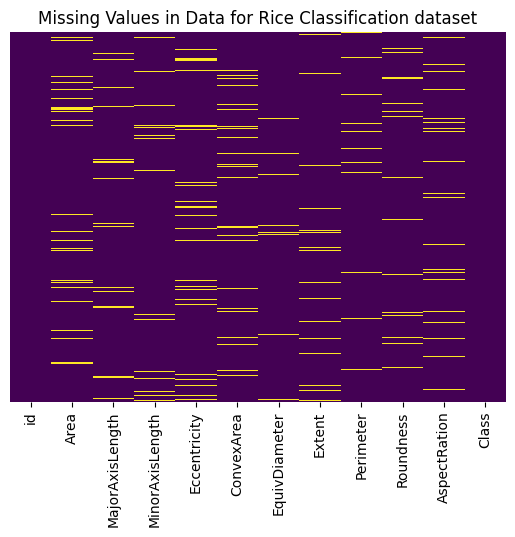

In [ ]:
# Generate heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# Add title
plt.title("Missing Values in Data for Rice Classification dataset")
# Show the plot
plt.show()

#2.Imputation

Statistical methods mean,median and mode

In [ ]:
#IMPUTING THE MISSING VALUES WITH STATISTICAL METHODS
impute='median'   # Can use these strategies: ['mean', 'median', 'most_frequent'] Change strategies and run code again
s_imputer=SimpleImputer(missing_values=np.nan,strategy=impute)  
s_imputer=s_imputer.fit(data.iloc[0:,1:11])
data.iloc[0:,1:11]=s_imputer.transform(data.iloc[0:,1:11])
data[0:10]

"#IMPUTING THE MISSING VALUES WITH STATISTICAL METHODS\nimpute='median'   # Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant']\ns_imputer=SimpleImputer(missing_values=np.nan,strategy=impute,verbose=0)  \ns_imputer=s_imputer.fit(data.iloc[0:,1:11])\ndata.iloc[0:,1:11]=s_imputer.transform(data.iloc[0:,1:11])\ndata[0:10]"

In [ ]:
#KNN IMPUTER (Dont' Run this shell when running the above piece of code skip above shell to run this)
impute='KNN'
impute_knn=KNNImputer(n_neighbors=200)   #KNN finds most similar rows and averages the value
impute_knn=impute_knn.fit(data.iloc[0:,1:11])
data.iloc[0:,1:11]=impute_knn.transform(data.iloc[0:,1:11])
data[0:10]

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,5109.905,92.229316,64.012769,0.719916,4677.00,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872.000,74.691881,51.400454,0.725553,5597.53,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,5487.270,76.293164,52.043491,0.731211,3132.00,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073.000,77.033628,51.928487,0.738639,3157.00,73.533241,0.783529,210.657,0.870203,2.382883,1
4,5,3693.000,85.124785,56.374021,0.749282,3802.00,68.571668,0.769375,230.332,0.874743,1.510000,1
5,6,2990.000,77.417073,50.954344,0.752861,3080.00,61.700780,0.584898,216.930,0.798439,1.519342,1
6,7,3556.000,84.323564,55.413061,0.892762,3636.00,67.287739,0.750211,227.007,0.867148,1.521727,1
7,8,3788.000,86.952411,56.444769,0.760664,5220.77,69.448048,0.800676,235.476,0.858473,1.540487,1
8,9,2629.000,74.133114,48.074144,0.761228,2790.00,57.856260,0.640595,207.325,0.768594,1.542058,1
9,10,5719.000,106.721142,68.977700,0.763053,5819.00,85.332625,0.754983,281.839,0.904748,1.547183,1


In [ ]:
#ONCE AGAIN CHECKING THE SUM OF MISSING VALUES
print(data.isnull().sum())

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64


<Axes: >

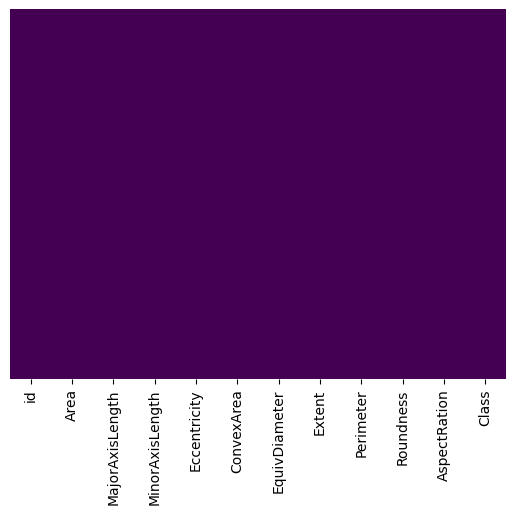

In [ ]:
#PLOTING THE MISSING VALUES
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

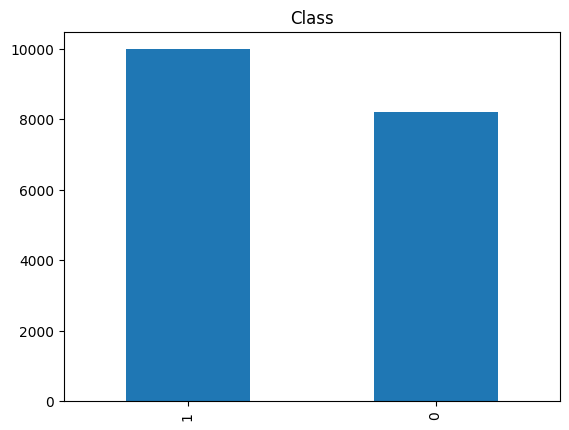

In [ ]:
#Plotting the classification column
data.Class.value_counts()[0:30].plot(kind='bar')
plt.title("Class")
plt.show()

#Data for training and Testing

In [ ]:
#Spiliting the dataset into 80:20 for training and testing respectively
from sklearn.model_selection import train_test_split
Y = data['Class']
X = data.drop(columns=['id','Class'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20, stratify=Y)

In [ ]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (14548, 10)
Y train shape:  (14548,)
X test shape:  (3637, 10)
Y test shape:  (3637,)


#1. Logistic regression classification

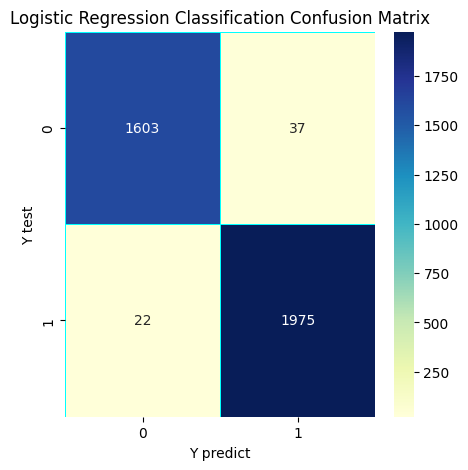

0.9837778388781964


In [ ]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=220)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

#confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

#confusion matrix
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

#2. SVM (Support Vector Machine) classification

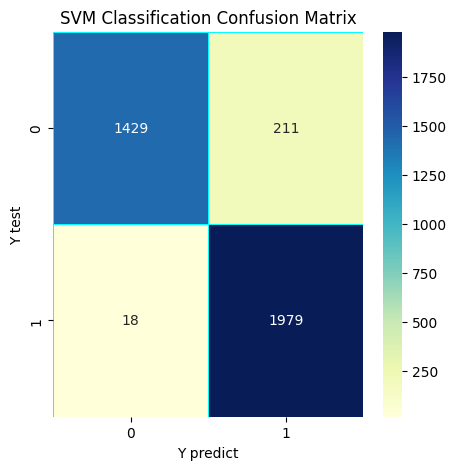

0.937036018696728


In [ ]:
  from sklearn.ensemble import BaggingClassifier
  from sklearn.multiclass import OneVsRestClassifier
  from sklearn.svm import SVC

  # We define the SVM model
  svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                                n_jobs=-1))
  # We train model
  svmcla.fit(X_train, Y_train)

  # We predict target values
  Y_predict2 = svmcla.predict(X_test)


  # The confusion matrix
  svmcla_cm = confusion_matrix(Y_test, Y_predict2)
  f, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
  plt.title('SVM Classification Confusion Matrix')
  plt.xlabel('Y predict')
  plt.ylabel('Y test')
  plt.show()

  # Test score
  score_svmcla = svmcla.score(X_test, Y_test)
  print(score_svmcla)

#3. Naive bayes classification

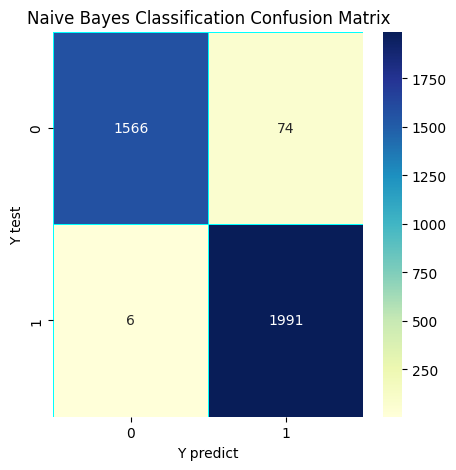

0.9780038493263679


In [ ]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

#4. Decision tree classification

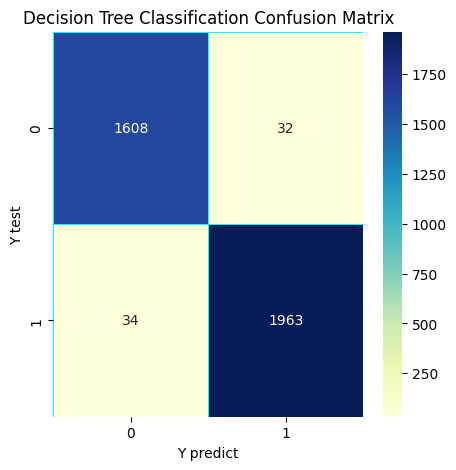

0.9818531756942535


In [ ]:

  from sklearn.tree import DecisionTreeClassifier

  # We define the model
  dtcla = DecisionTreeClassifier(random_state=9)

  # We train model
  dtcla.fit(X_train, Y_train)

  # We predict target values
  Y_predict4 = dtcla.predict(X_test)


  # The confusion matrix
  dtcla_cm = confusion_matrix(Y_test, Y_predict4)
  f, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
  plt.title('Decision Tree Classification Confusion Matrix')
  plt.xlabel('Y predict')
  plt.ylabel('Y test')
  plt.show()


  # Test score
  score_dtcla = dtcla.score(X_test, Y_test)
  print(score_dtcla)

# Comparison of classification techniques

In [ ]:
index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score']
test_scores=[score_logreg, score_svmcla, score_nbcla, score_dtcla]
Testscores = pd.Series(test_scores, index) 
print(Testscores)

Logistic Regression Score       0.983778
Support Vector Machine Score    0.937036
Naive Bayes Score               0.978004
Decision Tree Score             0.981853
dtype: float64


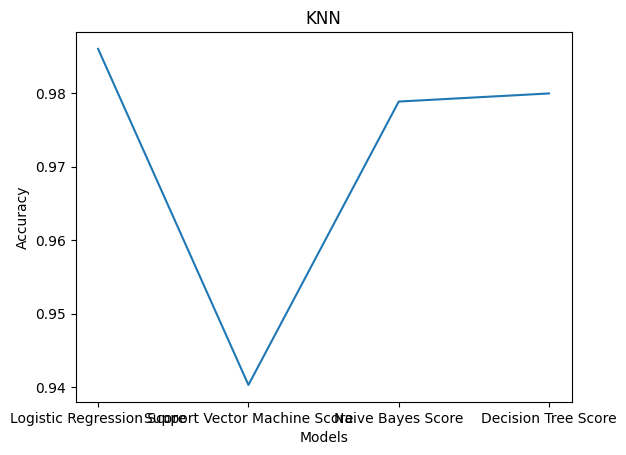

In [ ]:
plt.plot(index, test_scores)

# set the title and axis labels
plt.title(impute)
plt.xlabel('Models')
plt.ylabel('Accuracy')

# show the plot
plt.show()

###Confusion Matrix of all algorithms

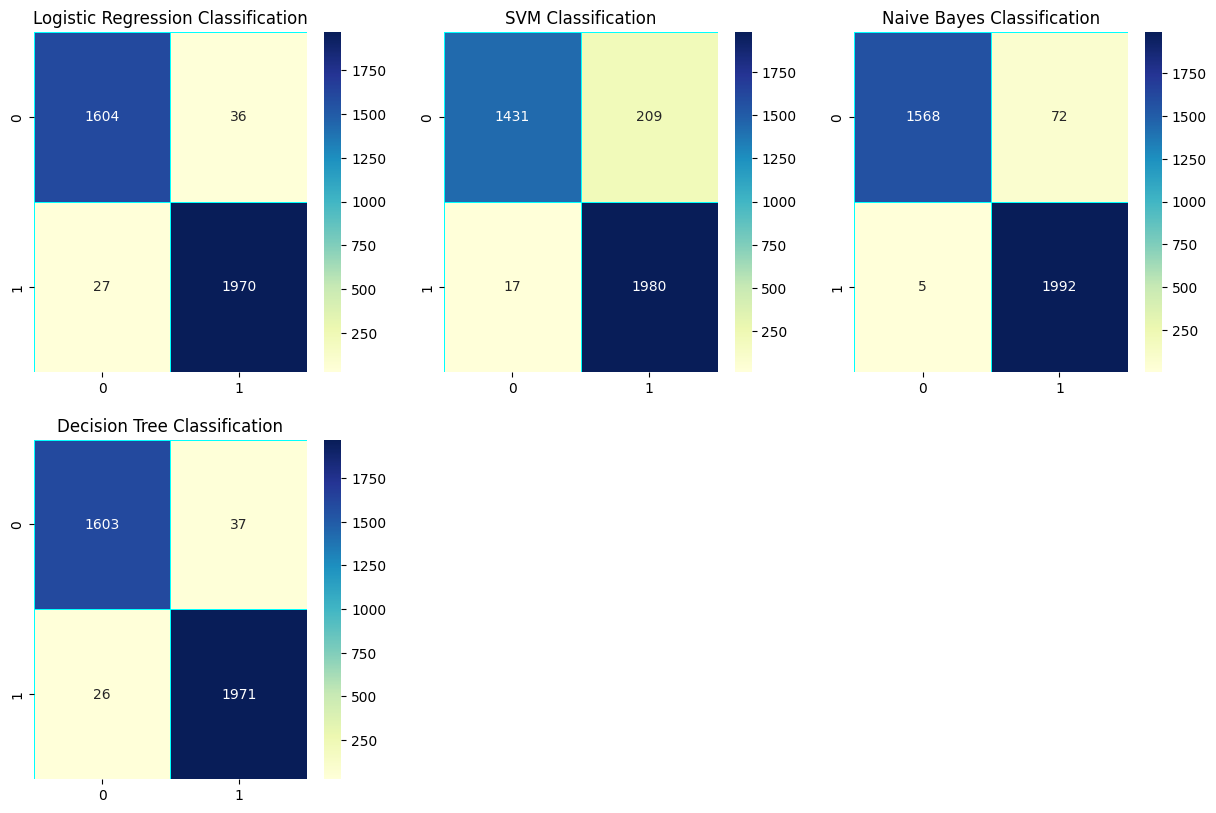

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
plt.show()

#Plotting Line graph for Rice classification dataset over all algorithms and using different imputation methods

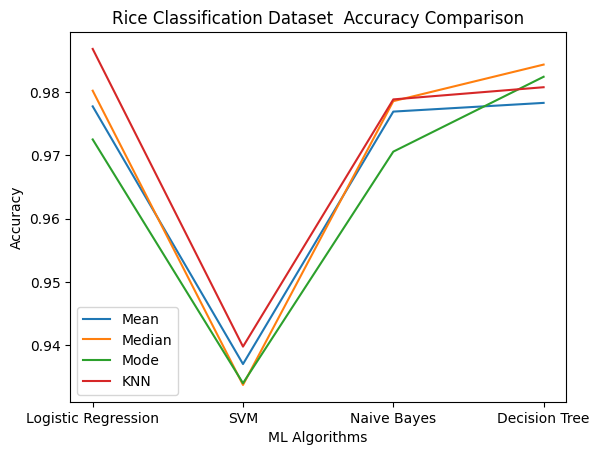

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
imputation = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree']
Mean = [0.977729, 0.937036, 0.976904, 0.978279]  
Median = [0.980203, 0.933737, 0.978554, 0.984328]
Mode = [0.972505, 0.934012, 0.97058, 0.982403]
KNN = [0.986802, 0.939786, 0.978829, 0.980753]

# Plot the data
plt.plot(imputation, Mean, label='Mean')
plt.plot(imputation, Median, label='Median')
plt.plot(imputation, Mode, label='Mode')
plt.plot(imputation, KNN, label='KNN')

# Add labels and title
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('Rice Classification Dataset  Accuracy Comparison')

# Add legend
plt.legend()

# Show the plot
plt.show()


#Plotting Line graph for UCI ML dataset over all algorithms and using different imputation methods

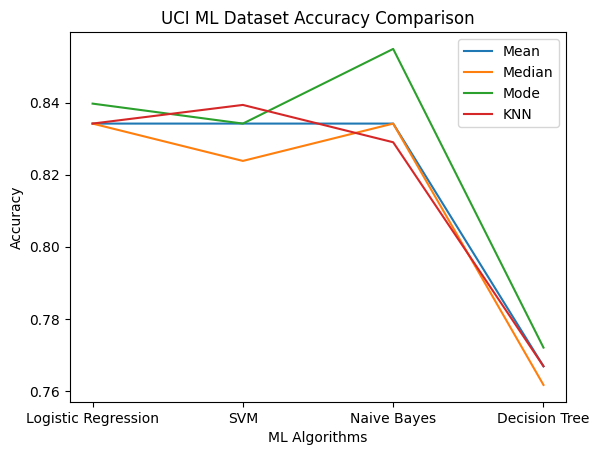

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
imputation = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree']
Mean = [0.834197, 0.834197, 0.834197, 0.766839]
Median = [0.834197, 0.823834, 0.834197, 0.761658]
Mode = [0.839741, 0.834197, 0.854922, 0.772021]
KNN = [ 0.834197, 0.839378, 0.829016, 0.766839]

# Plot the data
plt.plot(imputation, Mean, label='Mean')
plt.plot(imputation, Median, label='Median')
plt.plot(imputation, Mode, label='Mode')
plt.plot(imputation, KNN, label='KNN')

# Add labels and title
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('UCI ML Dataset Accuracy Comparison')

# Add legend
plt.legend()

# Show the plot
plt.show()

#Plotting Line graph for LungCancer dataset over all algorithms and using different imputation methods

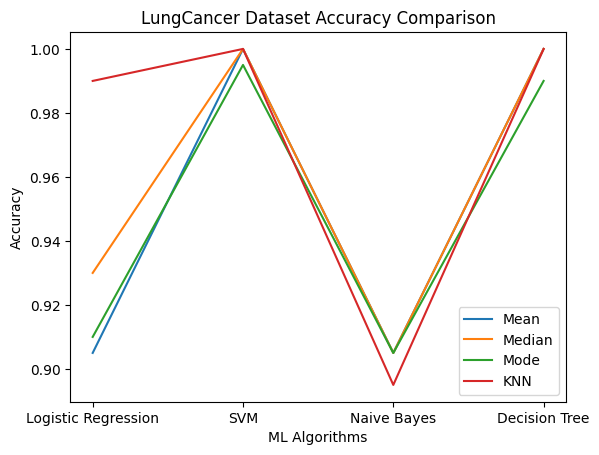

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
imputation = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree']
Mean = [0.905, 1, 0.905, 1]
Median = [0.93, 1, 0.905, 1]
Mode = [0.91, 0.995, 0.905, 0.99]
KNN = [0.99, 1, 0.895, 1]

# Plot the data
plt.plot(imputation, Mean, label='Mean')
plt.plot(imputation, Median, label='Median')
plt.plot(imputation, Mode, label='Mode')
plt.plot(imputation, KNN, label='KNN')

# Add labels and title
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('LungCancer Dataset Accuracy Comparison')

# Add legend
plt.legend()

# Show the plot
plt.show()

#Plotting Line graph for paris house pricing dataset over all algorithms and using different imputation methods

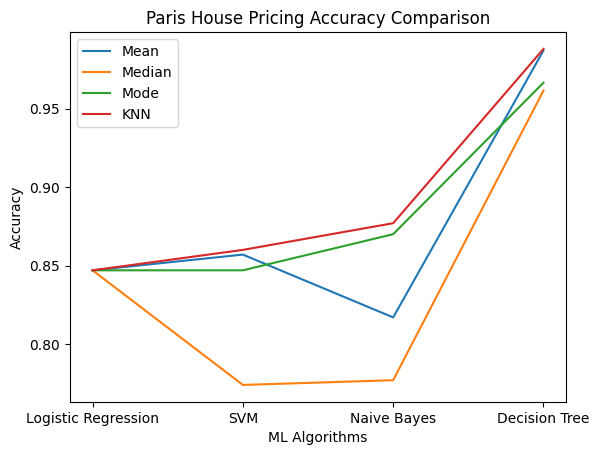

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
imputation = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree']
Mean = [0.847, 0.857, 0.817, 0.987]
Median =  [0.847, 0.774, 0.777, 0.9615]
Mode = [0.847, 0.847, 0.87, 0.9665]
KNN = [0.847, 0.86, 0.877, 0.988]

# Plot the data
plt.plot(imputation, Mean, label='Mean')
plt.plot(imputation, Median, label='Median')
plt.plot(imputation, Mode, label='Mode')
plt.plot(imputation, KNN, label='KNN')

# Add labels and title
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('Paris House Pricing Accuracy Comparison')

# Add legend
plt.legend()

# Show the plot
plt.show()

#We found KNN Imputation is good changing KNN values to check the accuracy for different K value

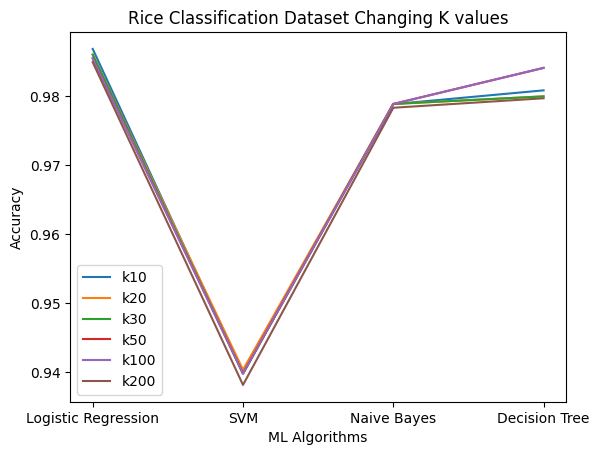

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
imputation = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree']
k10 = [0.9868, 0.9398, 0.9788, 0.9808]
k20 =  [0.985977, 0.940335, 0.978829, 0.979929]
k30 = [0.985977, 0.939786, 0.978829, 0.979929]
k50 = [0.985428, 0.939786, 0.978829, 0.984053]
k100 = [0.984878, 0.938136, 0.978279, 0.979654]
k200 = [0.983778, 0.937036, 0.978004, 0.981853]

# Plot the data
plt.plot(imputation, k10, label='k10')
plt.plot(imputation, k20, label='k20')
plt.plot(imputation, k30, label='k30')
plt.plot(imputation, k50, label='k50')
plt.plot(imputation, k50, label='k100')
plt.plot(imputation, k100, label='k200')

# Add labels and title
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('Rice Classification Dataset Changing K values')

# Add legend
plt.legend()

# Show the plot
plt.show()

#Checking imputation methods algorithm specific for Logistic regression

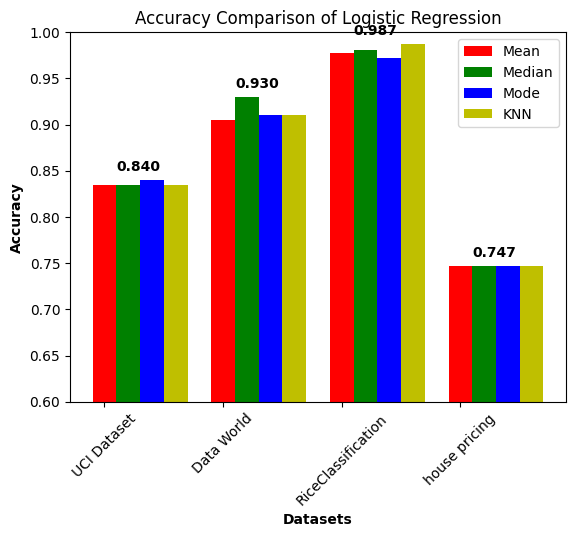

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
datasets = ['UCI Dataset', 'Data World', 'RiceClassification', 'house pricing']
mean = [0.834197, 0.905, 0.977729, 0.747]
median = [0.83497, 0.93, 0.980203, 0.747]
mode = [0.839741, 0.91, 0.972505, 0.747]
knn = [0.834297, 0.91, 0.986802, 0.747]

# Plot the data
x_pos = [i for i, _ in enumerate(datasets)]
plt.bar(x_pos, mean, color='r', width=0.2, label='Mean')
plt.bar([i+0.2 for i in x_pos], median, color='g', width=0.2, label='Median')
plt.bar([i+0.4 for i in x_pos], mode, color='b', width=0.2, label='Mode')
plt.bar([i+0.6 for i in x_pos], knn, color='y', width=0.2, label='KNN')

# Add labels and title
plt.xlabel('Datasets', fontweight='bold' )
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison of Logistic Regression')
plt.xticks(x_pos, datasets, rotation=45)

# Add legend
plt.legend()

# Add annotations
for i in range(len(x_pos)):
    max_val = max(mean[i], median[i], mode[i], knn[i])
    plt.annotate(f'{max_val:.3f}', xy=(i+0.1+0.2*(mean[i:i+1] == max_val),
                                       max_val+0.01),
                 color='black', fontweight='bold')

# Set y-axis range
plt.ylim([0.6, 1])

# Show the plot
plt.show()


#Checking imputation methods algorithm specific for SVM

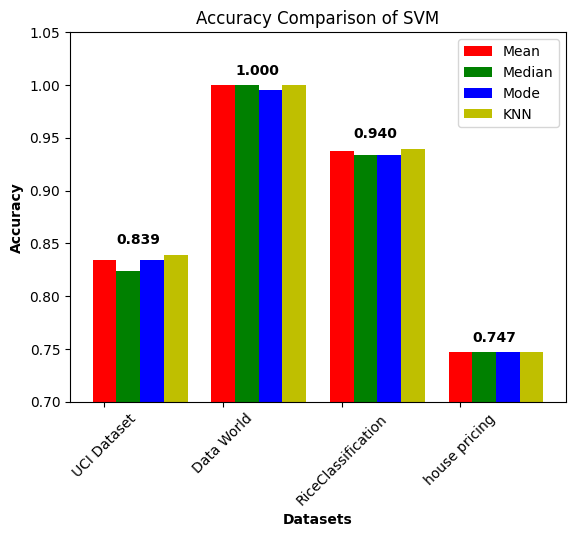

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
datasets = ['UCI Dataset', 'Data World', 'RiceClassification', 'house pricing']
mean = [0.834197, 1, 0.937, 0.747]
median = [0.823834, 1, 0.9337, 0.747]
mode = [0.834197, 0.995, 0.934, 0.747]
knn = [0.839378, 1, 0.9398, 0.747]

# Plot the data
x_pos = [i for i, _ in enumerate(datasets)]
plt.bar(x_pos, mean, color='r', width=0.2, label='Mean')
plt.bar([i+0.2 for i in x_pos], median, color='g', width=0.2, label='Median')
plt.bar([i+0.4 for i in x_pos], mode, color='b', width=0.2, label='Mode')
plt.bar([i+0.6 for i in x_pos], knn, color='y', width=0.2, label='KNN')

# Add labels and title
plt.xlabel('Datasets', fontweight='bold' )
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison of SVM')
plt.xticks(x_pos, datasets, rotation=45)

# Add legend
plt.legend()

# Add annotations
for i in range(len(x_pos)):
    max_val = max(mean[i], median[i], mode[i], knn[i])
    plt.annotate(f'{max_val:.3f}', xy=(i+0.1+0.2*(mean[i:i+1] == max_val),
                                       max_val+0.01),
                 color='black', fontweight='bold')

# Set y-axis range
plt.ylim([0.7, 1.05])

# Show the plot
plt.show()


#Checking imputation methods algorithm specific for Navie Bayes

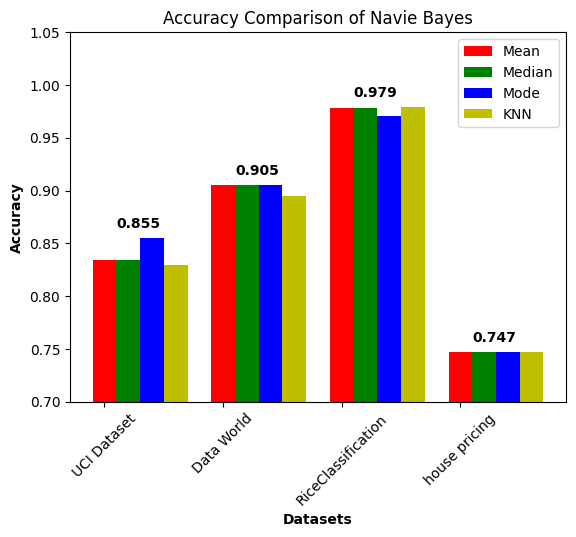

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
datasets = ['UCI Dataset', 'Data World', 'RiceClassification', 'house pricing']
mean = [0.834197, 0.905, 0.9779, 0.747]
median = [0.834197, 0.905, 0.9786, 0.747]
mode = [0.854922, 0.905, 0.9706, 0.747]
knn = [0.829016, 0.895, 0.9788, 0.747]

# Plot the data
x_pos = [i for i, _ in enumerate(datasets)]
plt.bar(x_pos, mean, color='r', width=0.2, label='Mean')
plt.bar([i+0.2 for i in x_pos], median, color='g', width=0.2, label='Median')
plt.bar([i+0.4 for i in x_pos], mode, color='b', width=0.2, label='Mode')
plt.bar([i+0.6 for i in x_pos], knn, color='y', width=0.2, label='KNN')

# Add labels and title
plt.xlabel('Datasets', fontweight='bold' )
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison of Navie Bayes')
plt.xticks(x_pos, datasets, rotation=45)

# Add legend
plt.legend()

# Add annotations
for i in range(len(x_pos)):
    max_val = max(mean[i], median[i], mode[i], knn[i])
    plt.annotate(f'{max_val:.3f}', xy=(i+0.1+0.2*(mean[i:i+1] == max_val),
                                       max_val+0.01),
                 color='black', fontweight='bold')

# Set y-axis range
plt.ylim([0.7, 1.05])

# Show the plot
plt.show()


#Checking imputation methods algorithm specific for Decision Tree

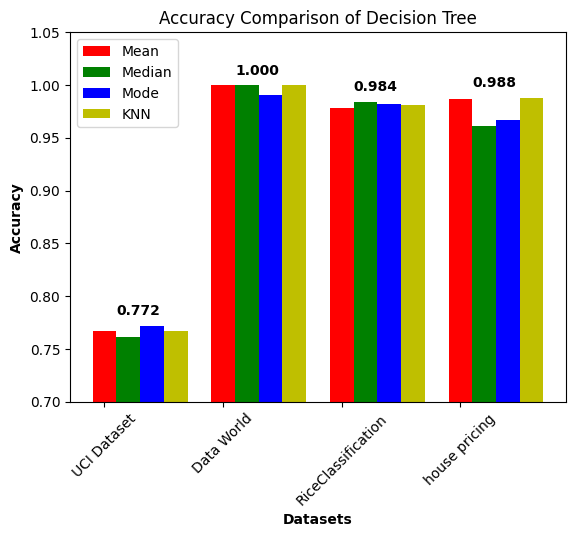

In [ ]:
import matplotlib.pyplot as plt

# These accuracies were noted when running the code and used for plotting
datasets = ['UCI Dataset', 'Data World', 'RiceClassification', 'house pricing']
mean = [0.766839, 1, 0.9783, 0.987]
median = [0.761658, 1, 0.9843, 0.9615]
mode = [0.772021, 0.99, 0.9824,0.9665]
knn = [0.766839, 1, 0.9808, 0.988]

# Plot the data
x_pos = [i for i, _ in enumerate(datasets)]
plt.bar(x_pos, mean, color='r', width=0.2, label='Mean')
plt.bar([i+0.2 for i in x_pos], median, color='g', width=0.2, label='Median')
plt.bar([i+0.4 for i in x_pos], mode, color='b', width=0.2, label='Mode')
plt.bar([i+0.6 for i in x_pos], knn, color='y', width=0.2, label='KNN')

# Add labels and title
plt.xlabel('Datasets', fontweight='bold' )
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison of Decision Tree')
plt.xticks(x_pos, datasets, rotation=45)

# Add legend
plt.legend()

# Add annotations
for i in range(len(x_pos)):
    max_val = max(mean[i], median[i], mode[i], knn[i])
    plt.annotate(f'{max_val:.3f}', xy=(i+0.1+0.2*(mean[i:i+1] == max_val),
                                       max_val+0.01),
                 color='black', fontweight='bold')

# Set y-axis range
plt.ylim([0.7, 1.05])

# Show the plot
plt.show()
